In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f90e00d0310>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [18]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_twelve_months = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_twelve_months)

2016-08-23


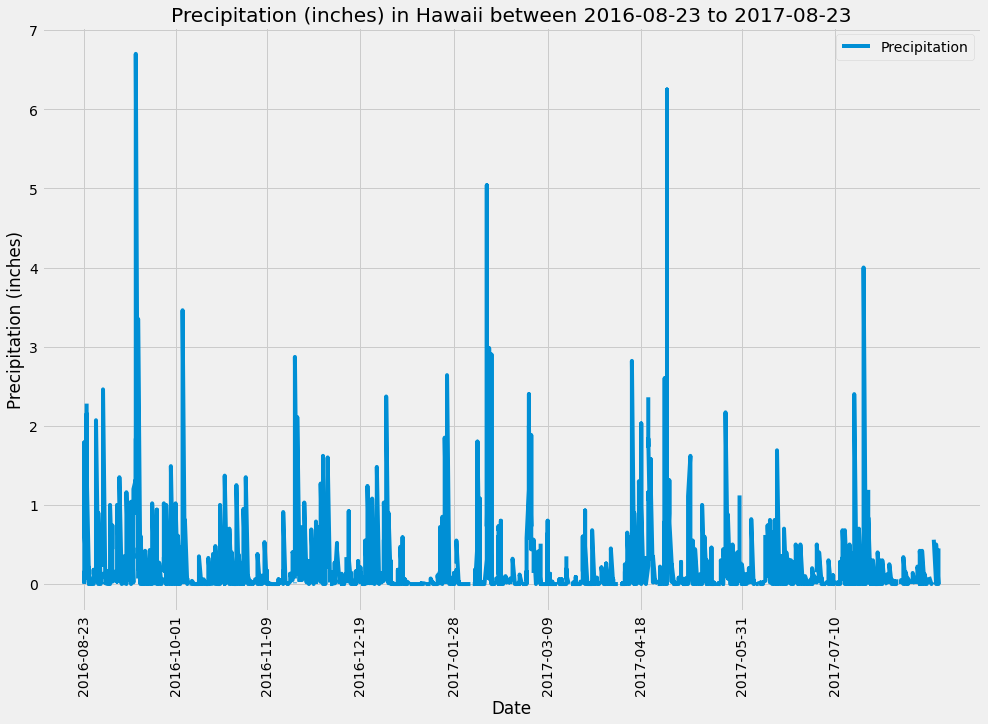

In [21]:
# Perform a query to retrieve the data and precipitation scores
twelve_months_precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()
                    

# Save the query results as a Pandas DataFrame and set the index to the date column
twelve_months_prcp = pd.DataFrame(twelve_months_precipitation)
twelve_months_prcp.columns = ['0', '1']
twelve_months_prcp.columns = ['Date', 'Precipitation']
twelve_months_prcp = twelve_months_prcp.set_index('Date')
twelve_months_prcp.head()

# Sort the dataframe by date
twelve_months_prcp = twelve_months_prcp.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15,10))
plt.plot(twelve_months_prcp)
plt.legend(['Precipitation'], loc="upper right")
plt.xticks(['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10'], rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation (inches) in Hawaii between 2016-08-23 to 2017-08-23')
plt.savefig("Images/Precipitation (inches) in Hawaii.png")

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
twelve_months_prcp.describe()

Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset
first = session.query(Station).first()
first.__dict__
station_number = session.query(Station.id).count()
print(station_number)

9


In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date.desc()).all()
temp_obs_df = pd.DataFrame(temp_obs)
temp_obs_df.columns = ['0', '1']
temp_obs_df.columns = ['Station_ID', 'Temperature']
temp_obs_df.head()

Station_ID  Temperature
0  USC00519281         79.0
1  USC00519281         76.0
2  USC00519281         76.0
3  USC00519281         77.0
4  USC00519281         77.0

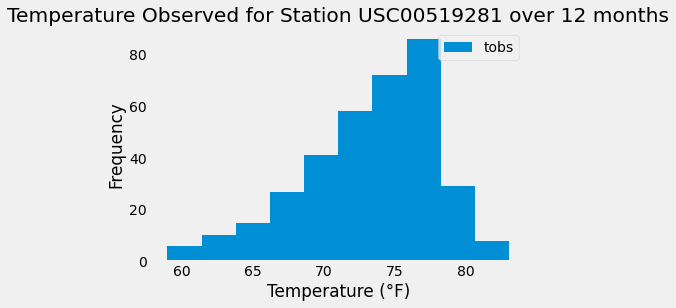

In [27]:
temp_obs_df.plot.hist(by='Station_ID')
plt.grid()
plt.legend(['tobs'], loc="upper right")
plt.title("Temperature Observed for Station USC00519281 over 12 months")
plt.xlabel("Temperature (°F)")
plt.savefig("Images/Temperature Observed Station USC00519281.png")

# Close session

In [28]:
# Close Session
session.close()